In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank.csv',sep = ';')     # loading the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()            # 10 Categorical features, 10 Continuos/numerical features, 1 target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.isnull().sum()      # though count of null values is zero, the null values are mentioned as unknown

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df1 = df.copy()

## Exploratory Data Analysis

### Univariate Analysis

##### Age

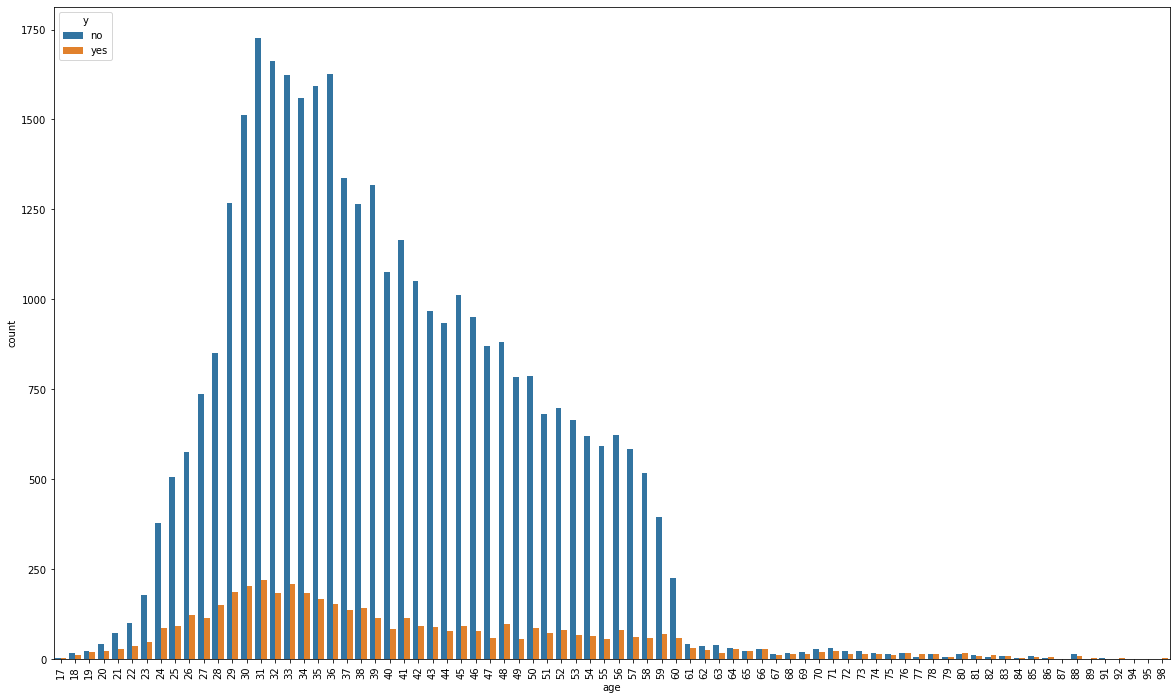

In [7]:
plt.figure(figsize = (20,12))
chart = sns.countplot(df['age'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [8]:
(pd.crosstab(df['y'], (df['age'] < 60) & (df['age'] > 23)))/len(df)*100

age,False,True
y,,
no,2.806643,85.927940
yes,1.558706,9.706711


In [9]:
(((df['age'] < 60) & (df['age'] > 23)).groupby(df['y']).agg('sum'))/sum(((df['age'] < 60) & (df['age'] > 23)).groupby(df['y']).agg('sum'))*100

y
no     89.850216
yes    10.149784
Name: age, dtype: float64

In [10]:
(((df['age'] > 60) | (df['age'] < 23)).groupby(df['y']).agg('sum'))/sum(((df['age'] > 60) | (df['age'] < 23)).groupby(df['y']).agg('sum'))*100

y
no     58.417378
yes    41.582622
Name: age, dtype: float64

##### Job

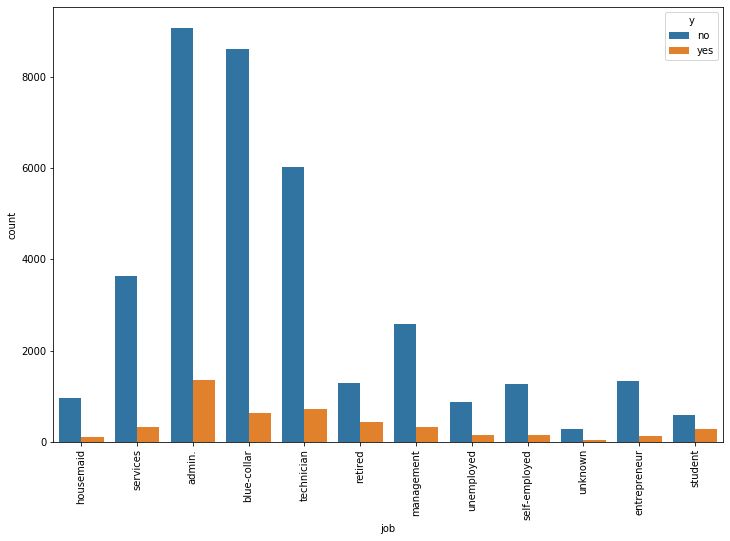

In [11]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['job'],hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
plt.show()

In [12]:
(pd.crosstab(df['y'],df['job'])/len(df))*100

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,22.020977,20.918714,3.233952,2.316209,6.302807,3.122269,3.088278,8.852093,1.456735,14.598912,2.112266,0.711372
yes,3.282509,1.548995,0.301059,0.257357,0.796348,1.053705,0.361756,0.784209,0.667670,1.772361,0.349616,0.089832


In [13]:
for i in df['job'].unique():
    print(i)
    print((((df['job'] == i).groupby(df['y']).agg('sum'))/sum(((df['job'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*30)

housemaid
y
no     90.0
yes    10.0
Name: job, dtype: float64
------------------------------
services
y
no     91.86193
yes     8.13807
Name: job, dtype: float64
------------------------------
admin.
y
no     87.027442
yes    12.972558
Name: job, dtype: float64
------------------------------
blue-collar
y
no     93.105684
yes     6.894316
Name: job, dtype: float64
------------------------------
technician
y
no     89.173958
yes    10.826042
Name: job, dtype: float64
------------------------------
retired
y
no     74.767442
yes    25.232558
Name: job, dtype: float64
------------------------------
management
y
no     88.78249
yes    11.21751
Name: job, dtype: float64
------------------------------
unemployed
y
no     85.798817
yes    14.201183
Name: job, dtype: float64
------------------------------
self-employed
y
no     89.514426
yes    10.485574
Name: job, dtype: float64
------------------------------
unknown
y
no     88.787879
yes    11.212121
Name: job, dtype: float64
--------------

##### Marital Status

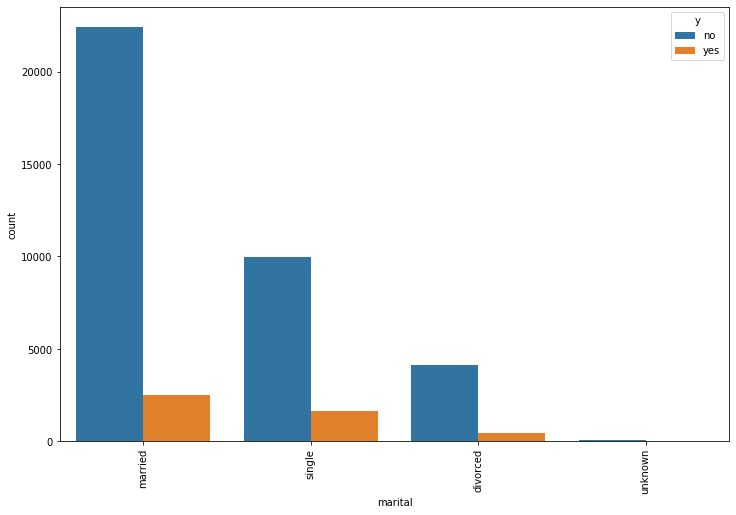

In [14]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['marital'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [15]:
for i in df['marital'].unique():
    print(i)
    print((((df['marital'] == i).groupby(df['y']).agg('sum'))/sum(((df['marital'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*30)

married
y
no     89.842747
yes    10.157253
Name: marital, dtype: float64
------------------------------
single
y
no     85.995851
yes    14.004149
Name: marital, dtype: float64
------------------------------
divorced
y
no     89.679098
yes    10.320902
Name: marital, dtype: float64
------------------------------
unknown
y
no     85.0
yes    15.0
Name: marital, dtype: float64
------------------------------


##### Education

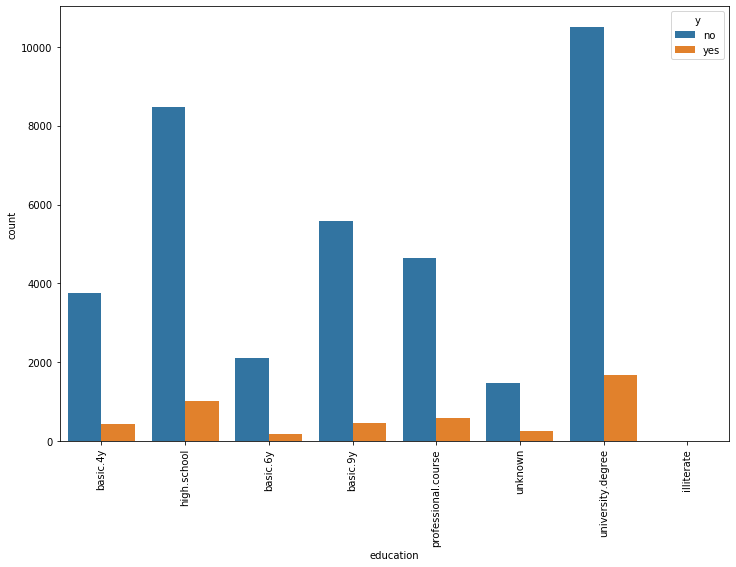

In [16]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['education'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [17]:
for i in df['education'].unique():
    print(i)
    print((((df['education'] == i).groupby(df['y']).agg('sum'))/sum(((df['education'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*35)

basic.4y
y
no     89.750958
yes    10.249042
Name: education, dtype: float64
-----------------------------------
high.school
y
no     89.164477
yes    10.835523
Name: education, dtype: float64
-----------------------------------
basic.6y
y
no     91.797557
yes     8.202443
Name: education, dtype: float64
-----------------------------------
basic.9y
y
no     92.175352
yes     7.824648
Name: education, dtype: float64
-----------------------------------
professional.course
y
no     88.651535
yes    11.348465
Name: education, dtype: float64
-----------------------------------
unknown
y
no     85.499711
yes    14.500289
Name: education, dtype: float64
-----------------------------------
university.degree
y
no     86.275477
yes    13.724523
Name: education, dtype: float64
-----------------------------------
illiterate
y
no     77.777778
yes    22.222222
Name: education, dtype: float64
-----------------------------------


In [18]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

##### Default

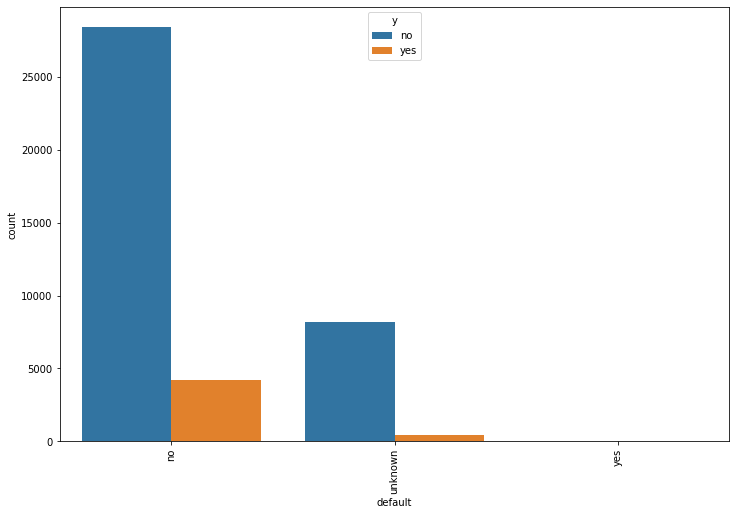

In [19]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['default'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [20]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

##### Housing Loan

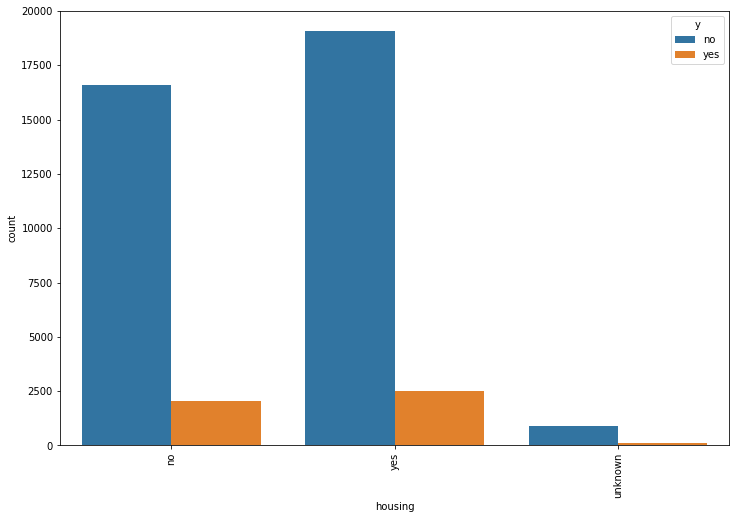

In [21]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['housing'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [22]:
((df['housing'] == 'yes').groupby(df['y']).agg('sum'))/sum((df['housing'] == 'yes').groupby(df['y']).agg('sum'))*100

y
no     88.380608
yes    11.619392
Name: housing, dtype: float64

In [23]:
((df['housing'] == 'no').groupby(df['y']).agg('sum'))/sum((df['housing'] == 'no').groupby(df['y']).agg('sum'))*100

y
no     89.120395
yes    10.879605
Name: housing, dtype: float64

##### Personal Loan

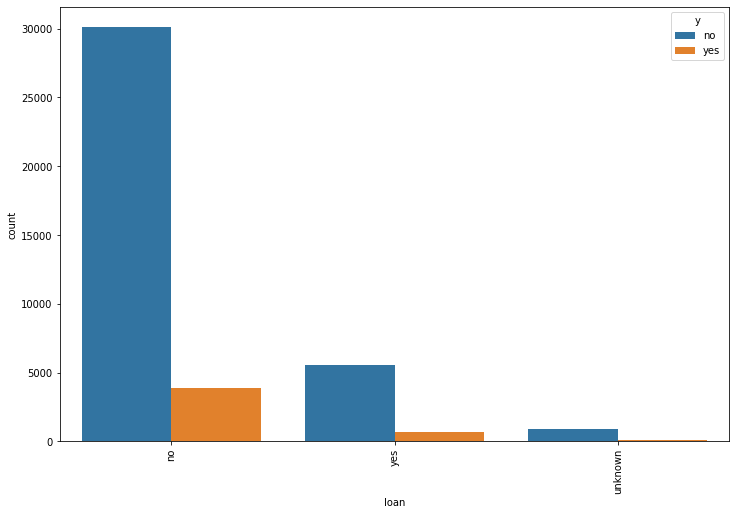

In [24]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['loan'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [25]:
for i in df['loan'].unique():
    print(i)
    print((((df['loan'] == i).groupby(df['y']).agg('sum'))/sum(((df['loan'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*30)

no
y
no     88.659794
yes    11.340206
Name: loan, dtype: float64
------------------------------
yes
y
no     89.068502
yes    10.931498
Name: loan, dtype: float64
------------------------------
unknown
y
no     89.191919
yes    10.808081
Name: loan, dtype: float64
------------------------------


In [26]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

##### Contact Type

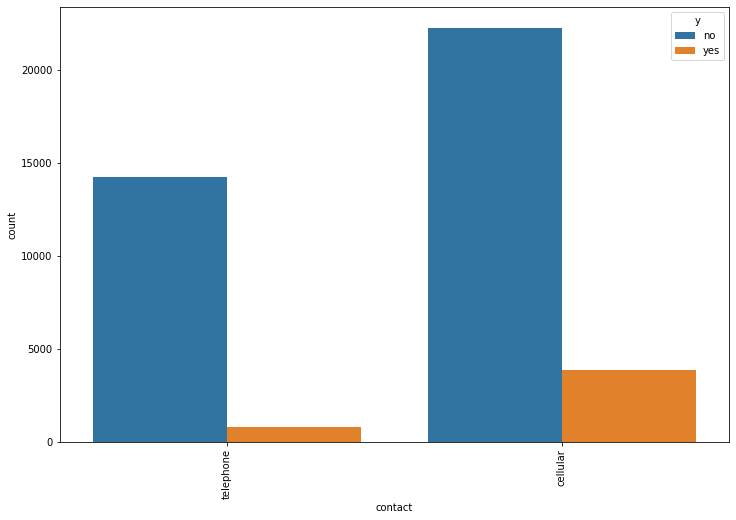

In [27]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['contact'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [28]:
for i in df['contact'].unique():
    print(i)
    print((((df['contact'] == i).groupby(df['y']).agg('sum'))/sum(((df['contact'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*30)

telephone
y
no     94.768679
yes     5.231321
Name: contact, dtype: float64
------------------------------
cellular
y
no     85.262393
yes    14.737607
Name: contact, dtype: float64
------------------------------


##### Month Contacted

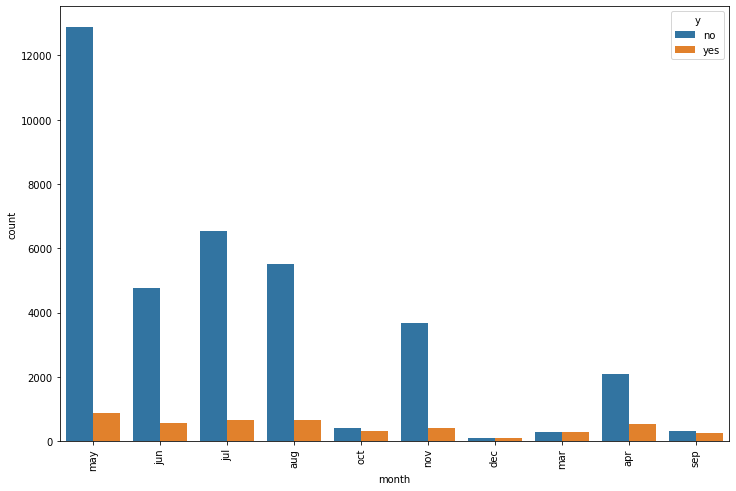

In [29]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['month'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [30]:
for i in df['month'].unique():
    print(i)
    print((((df['month'] == i).groupby(df['y']).agg('sum'))/sum(((df['month'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*30)

may
y
no     93.565255
yes     6.434745
Name: month, dtype: float64
------------------------------
jun
y
no     89.48853
yes    10.51147
Name: month, dtype: float64
------------------------------
jul
y
no     90.953443
yes     9.046557
Name: month, dtype: float64
------------------------------
aug
y
no     89.397863
yes    10.602137
Name: month, dtype: float64
------------------------------
oct
y
no     56.128134
yes    43.871866
Name: month, dtype: float64
------------------------------
nov
y
no     89.856133
yes    10.143867
Name: month, dtype: float64
------------------------------
dec
y
no     51.098901
yes    48.901099
Name: month, dtype: float64
------------------------------
mar
y
no     49.450549
yes    50.549451
Name: month, dtype: float64
------------------------------
apr
y
no     79.521277
yes    20.478723
Name: month, dtype: float64
------------------------------
sep
y
no     55.087719
yes    44.912281
Name: month, dtype: float64
------------------------------


In [31]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

##### Day Contatcted

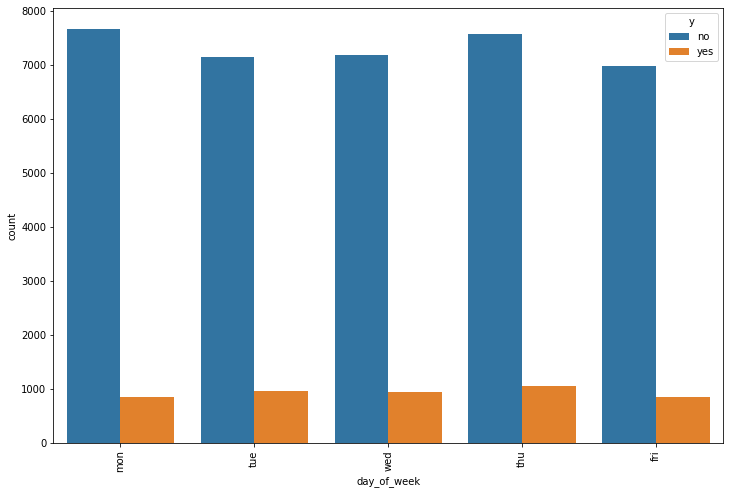

In [32]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['day_of_week'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [33]:
for i in df['day_of_week'].unique():
    print(i)
    print((((df['day_of_week'] == i).groupby(df['y']).agg('sum'))/sum(((df['day_of_week'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*35)

mon
y
no     90.05168
yes     9.94832
Name: day_of_week, dtype: float64
-----------------------------------
tue
y
no     88.220025
yes    11.779975
Name: day_of_week, dtype: float64
-----------------------------------
wed
y
no     88.332924
yes    11.667076
Name: day_of_week, dtype: float64
-----------------------------------
thu
y
no     87.881248
yes    12.118752
Name: day_of_week, dtype: float64
-----------------------------------
fri
y
no     89.191261
yes    10.808739
Name: day_of_week, dtype: float64
-----------------------------------


##### Outcome of the customer in the previous Campaign

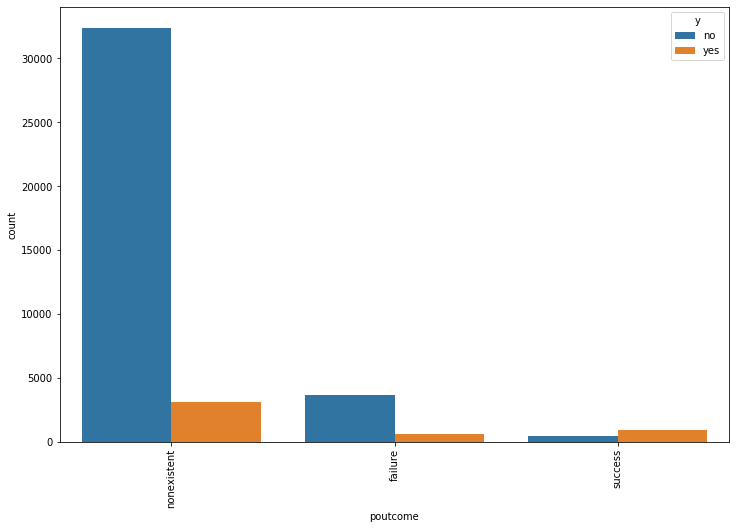

In [34]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['poutcome'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [35]:
for i in df['poutcome'].unique():
    print(i)
    print((((df['poutcome'] == i).groupby(df['y']).agg('sum'))/sum(((df['poutcome'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*31)

nonexistent
y
no     91.167787
yes     8.832213
Name: poutcome, dtype: float64
-------------------------------
failure
y
no     85.771402
yes    14.228598
Name: poutcome, dtype: float64
-------------------------------
success
y
no     34.887109
yes    65.112891
Name: poutcome, dtype: float64
-------------------------------


##### pdays

In [36]:
(pd.crosstab(df['y'],(df['pdays'] == 999))/len(df))*100

pdays,False,True
y,,
no,1.330485,87.404098
yes,2.347771,8.917646


In [37]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [38]:
o = []
for i in df1['pdays']:
    if i == 999:
        a = '0'
    else :
        a = '1'
    o.append(a)
    
df1['is_old_customer'] = o
df1 = df1.drop('pdays', 1)

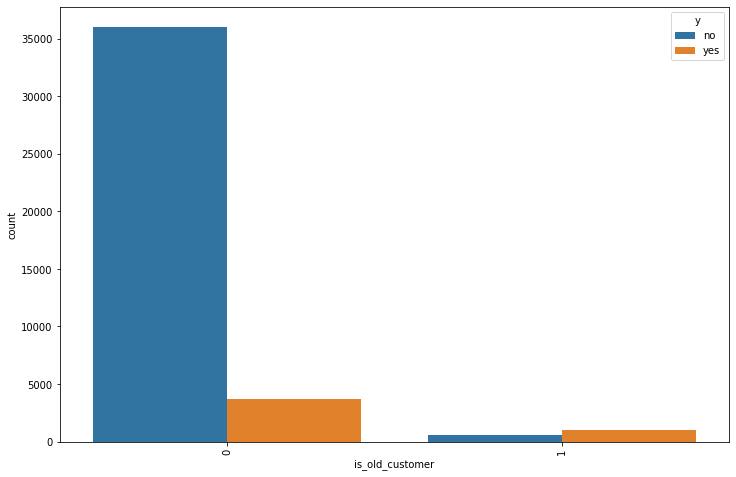

In [39]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df1['is_old_customer'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

##### emp.var.rate

In [40]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [41]:
df['emp.var.rate'] = df['emp.var.rate'].astype('object')
df1['emp.var.rate'] = df1['emp.var.rate'].astype('object')

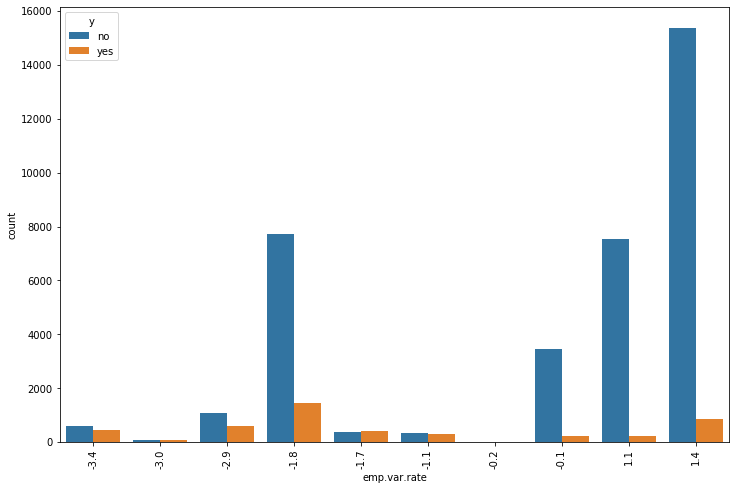

In [42]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['emp.var.rate'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [43]:
for i in df['emp.var.rate'].sort_values(ascending=False).unique():
    print(i)
    print((((df['emp.var.rate'] == i).groupby(df['y']).agg('sum'))/sum(((df['emp.var.rate'] == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*35)

1.4
y
no     94.665517
yes     5.334483
Name: emp.var.rate, dtype: float64
-----------------------------------
1.1
y
no     96.908412
yes     3.091588
Name: emp.var.rate, dtype: float64
-----------------------------------
-0.1
y
no     93.700787
yes     6.299213
Name: emp.var.rate, dtype: float64
-----------------------------------
-0.2
y
no     90.0
yes    10.0
Name: emp.var.rate, dtype: float64
-----------------------------------
-1.1
y
no     52.598425
yes    47.401575
Name: emp.var.rate, dtype: float64
-----------------------------------
-1.7
y
no     47.865459
yes    52.134541
Name: emp.var.rate, dtype: float64
-----------------------------------
-1.8
y
no     84.091899
yes    15.908101
Name: emp.var.rate, dtype: float64
-----------------------------------
-2.9
y
no     64.281419
yes    35.718581
Name: emp.var.rate, dtype: float64
-----------------------------------
-3.0
y
no     48.837209
yes    51.162791
Name: emp.var.rate, dtype: float64
-----------------------------------
-3.4

#### cons.price.idx

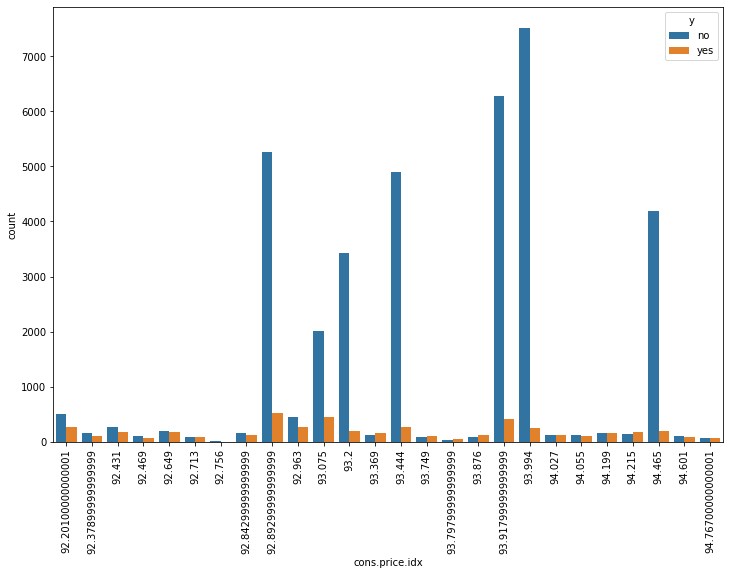

In [44]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['cons.price.idx'],hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
plt.show()

In [45]:
a = pd.cut(df['cons.price.idx'], 3)
a.value_counts()

(93.912, 94.767]    20230
(93.056, 93.912]    11966
(92.198, 93.056]     8992
Name: cons.price.idx, dtype: int64

In [46]:
for i in a.sort_values(ascending = False).unique():
    print(i)
    print((((a == i).groupby(df['y']).agg('sum'))/sum(((a == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*38)

(93.912, 94.767]
y
no     92.392486
yes     7.607514
Name: cons.price.idx, dtype: float64
--------------------------------------
(93.056, 93.912]
y
no     89.018887
yes    10.981113
Name: cons.price.idx, dtype: float64
--------------------------------------
(92.198, 93.056]
y
no     80.126779
yes    19.873221
Name: cons.price.idx, dtype: float64
--------------------------------------


In [47]:
l = []
for i in df['cons.price.idx']:
    if 92.198 <= i <= 93.056:
        a = '0'
    elif 93.056 < i <= 93.912:
        a = '1'
    elif i > 93.912:
        a = '2'
    l.append(a)

In [48]:
df1['price.idx.range'] = l
df1 = df1.drop('cons.price.idx', 1)

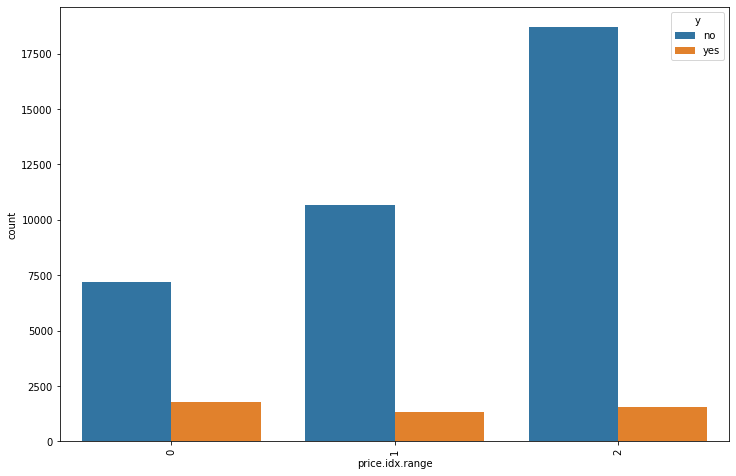

In [49]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df1['price.idx.range'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

#### cons.conf.idx

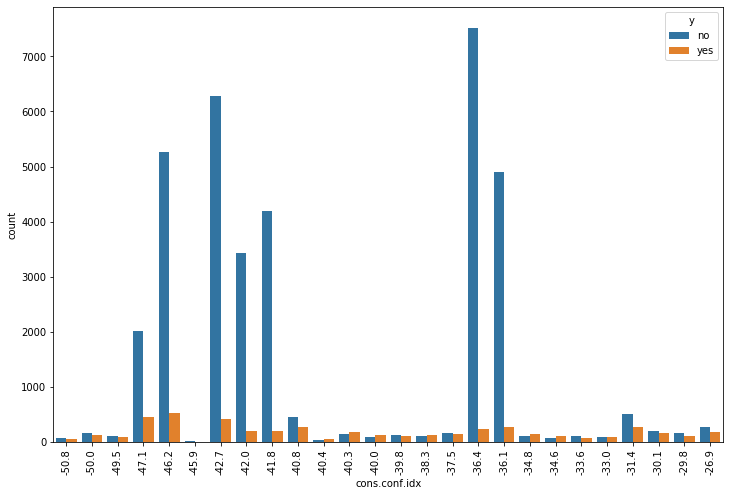

In [50]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['cons.conf.idx'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [51]:
b = pd.cut(df['cons.conf.idx'], 3)
(b.value_counts()/df.shape[0])*100

(-42.833, -34.867]    72.067107
(-50.824, -42.833]    21.549966
(-34.867, -26.9]       6.382927
Name: cons.conf.idx, dtype: float64

In [52]:
for i in b.sort_values(ascending = False).unique():
    print(i)
    print((((b == i).groupby(df['y']).agg('sum'))/sum(((b == i).groupby(df['y']).agg('sum'))))*100)
    print('-'*38)

(-34.867, -26.9]
y
no     57.436288
yes    42.563712
Name: cons.conf.idx, dtype: float64
--------------------------------------
(-42.833, -34.867]
y
no     92.328942
yes     7.671058
Name: cons.conf.idx, dtype: float64
--------------------------------------
(-50.824, -42.833]
y
no     85.984678
yes    14.015322
Name: cons.conf.idx, dtype: float64
--------------------------------------


In [53]:
s = []
for i in df['cons.conf.idx']:
    if -50.824 <= i <= -42.833:
        a = '0'
    elif -42.833 < i <= -34.867:
        a = '1'
    elif i > -34.867:
        a = '2'
    s.append(a)    

In [54]:
df1['conf.idx.range'] = s
df1 = df1.drop('cons.conf.idx', 1)

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### nr.employed

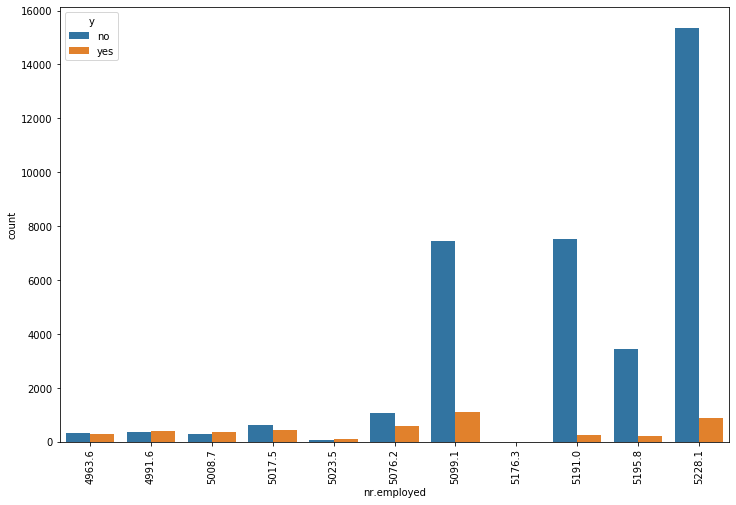

In [56]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['nr.employed'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [57]:
df['nr.employed'] = df['nr.employed'].astype('object') 
df1['nr.employed'] = df1['nr.employed'].astype('object') 

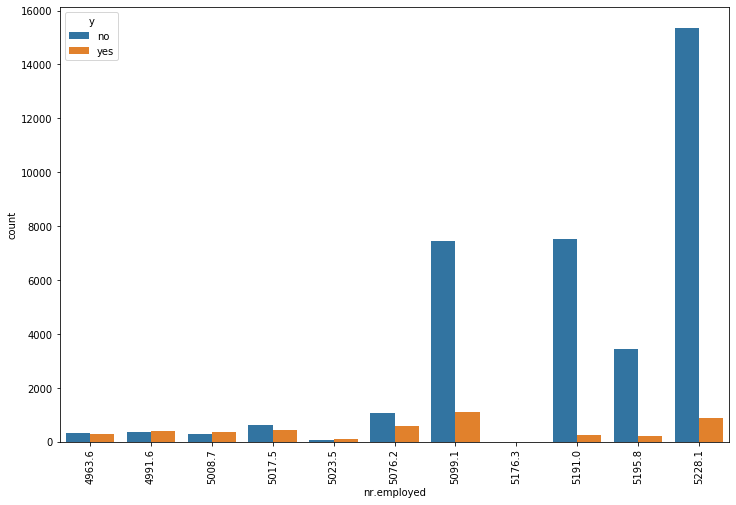

In [58]:
plt.figure(figsize = (12,8))
chart = sns.countplot(df['nr.employed'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

### Bivariate and Multivariate Analysis

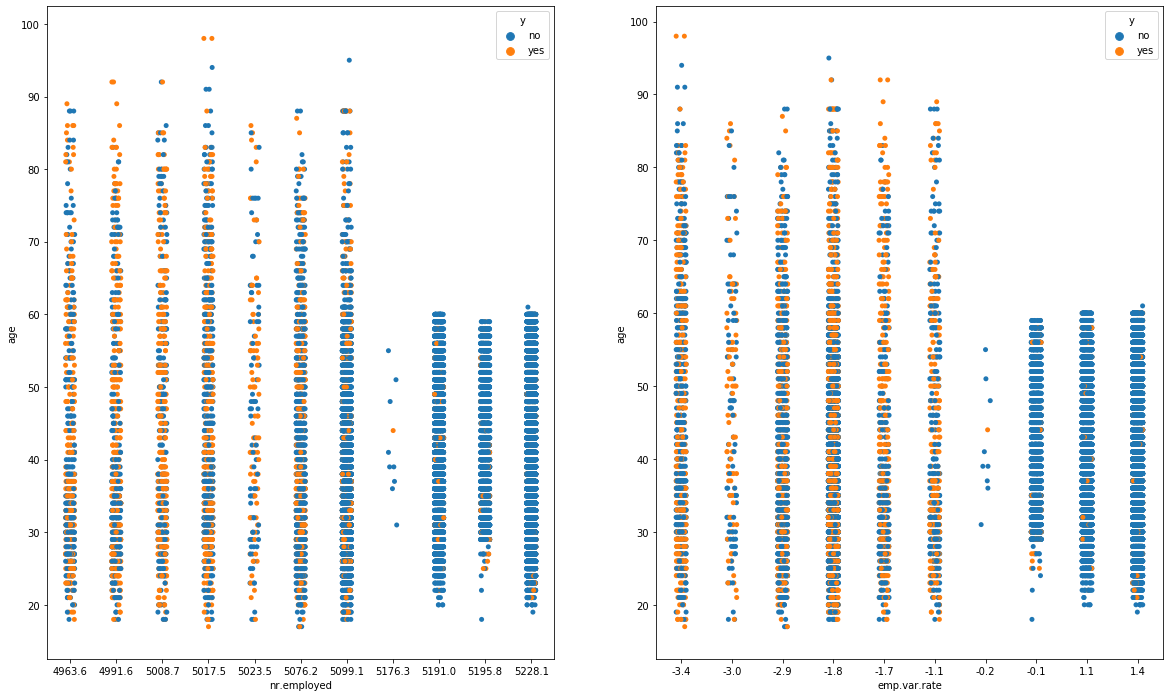

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (20,12))
sns.stripplot(df['nr.employed'], df['age'], hue = df['y'], ax = ax[0])
sns.stripplot(df['emp.var.rate'], df['age'], hue = df['y'], ax = ax[1])
plt.show()

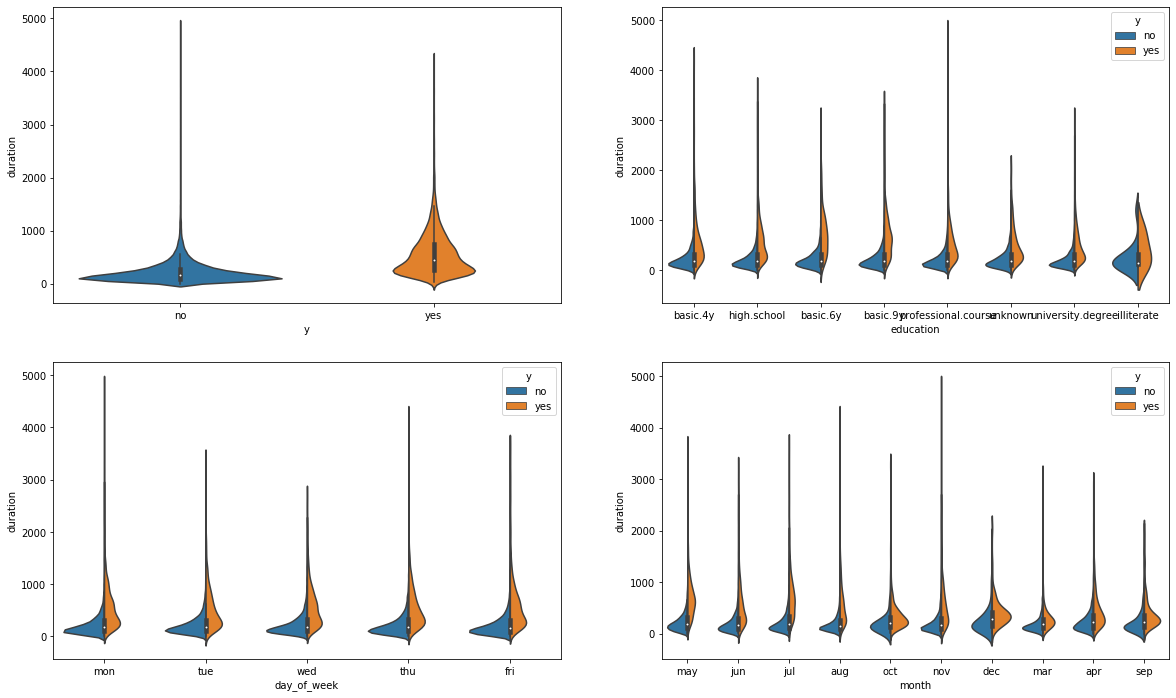

In [60]:
fig,ax = plt.subplots(2, 2, figsize = (20,12))
sns.violinplot(df['y'], df['duration'], ax = ax[0,0])
sns.violinplot(df['education'], df['duration'], hue = df['y'], split = True, ax = ax[0,1])
sns.violinplot(df['day_of_week'], df['duration'], hue = df['y'], split = True, ax = ax[1,0])
sns.violinplot(df['month'], df['duration'], hue = df['y'], split = True, ax = ax[1,1])
plt.show()

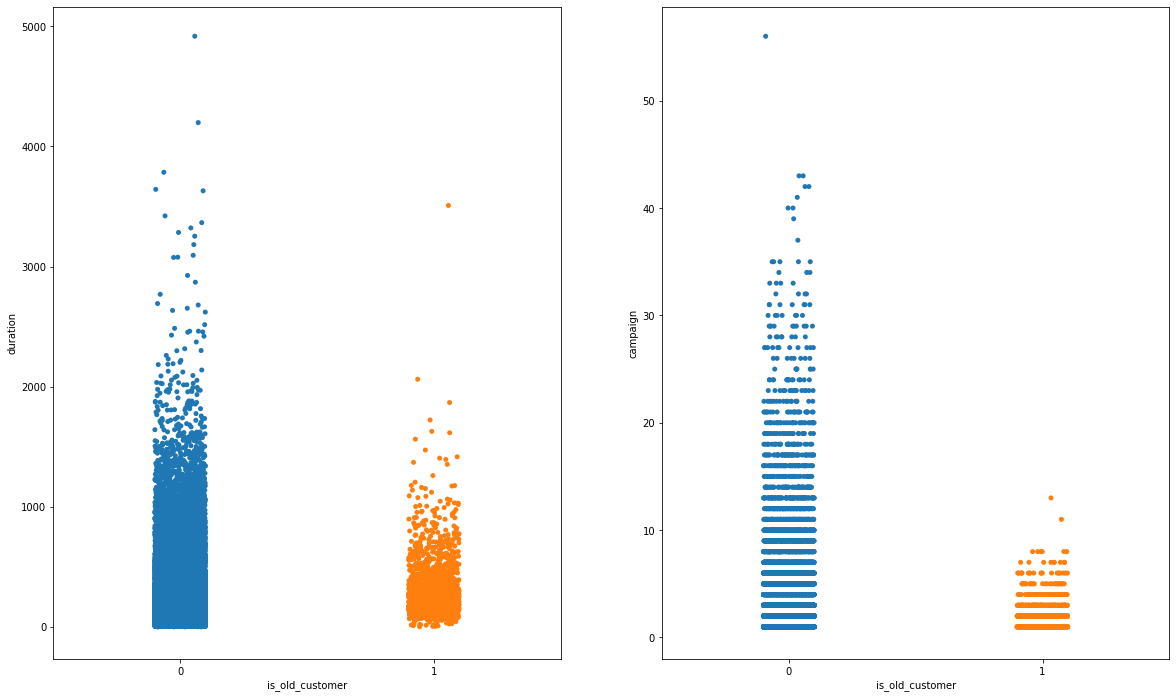

In [61]:
fig,ax = plt.subplots(1,2,figsize=(20,12))
sns.stripplot(df1['is_old_customer'], df1['duration'], ax = ax[0])
sns.stripplot(df1['is_old_customer'], df1['campaign'], ax = ax[1])
plt.show()

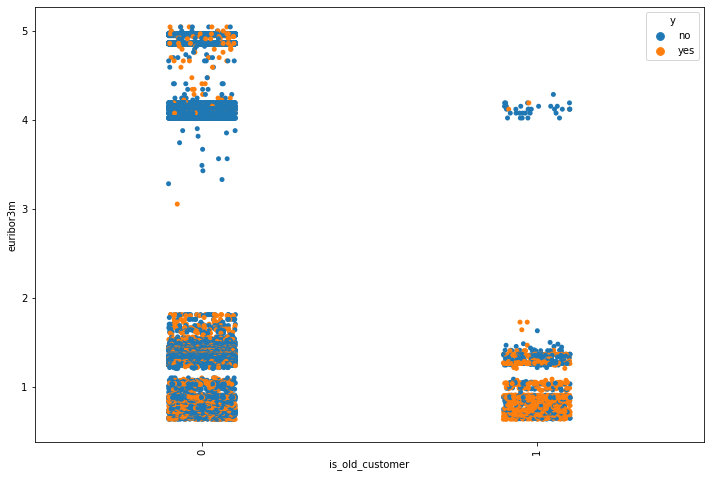

In [62]:
plt.figure(figsize = (12,8))
chart = sns.stripplot(df1['is_old_customer'], df1['euribor3m'], hue = df1['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

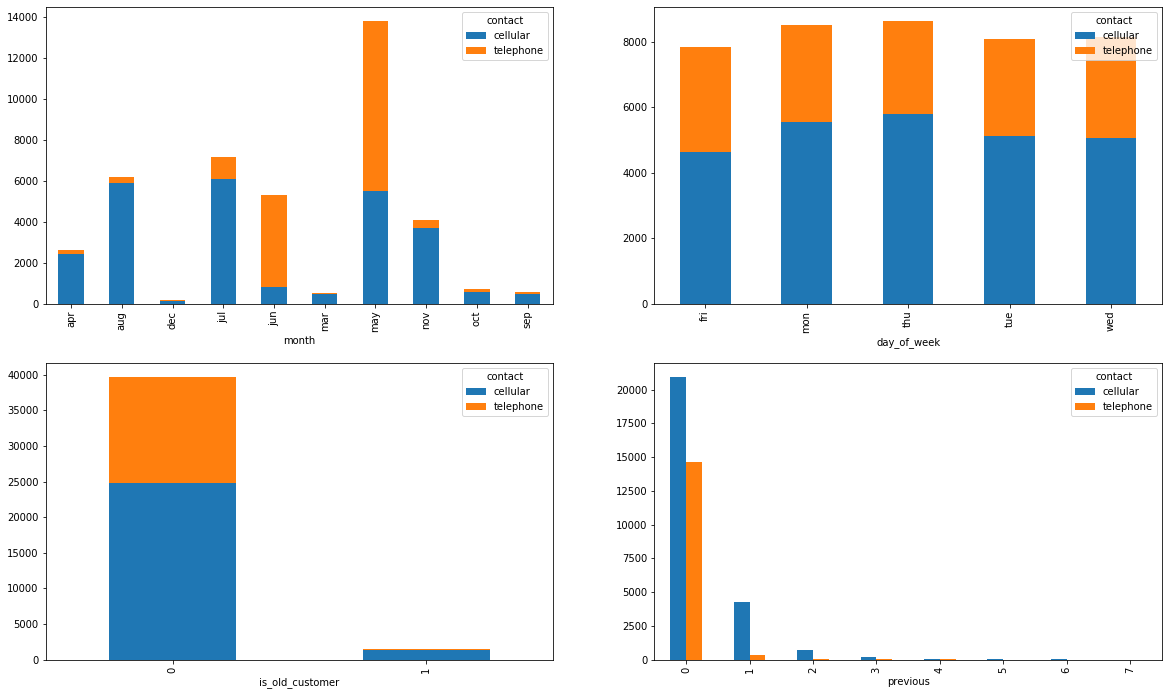

In [63]:
fig, ax = plt.subplots(2, 2, figsize = (20,12))
pd.crosstab(df1['month'], df1['contact']).plot(kind = 'bar', stacked = True, ax = ax[0,0])
pd.crosstab(df1['day_of_week'], df1['contact']).plot(kind = 'bar', stacked = True, ax = ax[0,1])
pd.crosstab(df1['is_old_customer'], df1['contact']).plot(kind = 'bar', stacked = True, ax = ax[1,0])
pd.crosstab(df1['previous'], df1['contact']).plot(kind = 'bar', ax = ax[1,1])
plt.show()

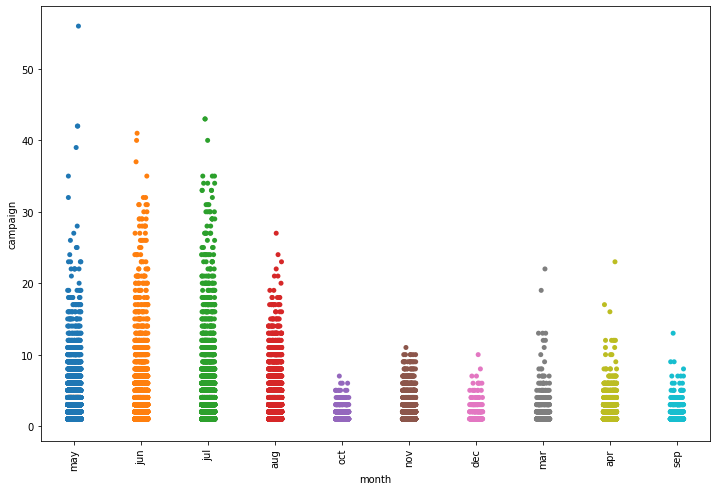

In [64]:
plt.figure(figsize = (12,8))
chart = sns.stripplot(df['month'], df['campaign'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

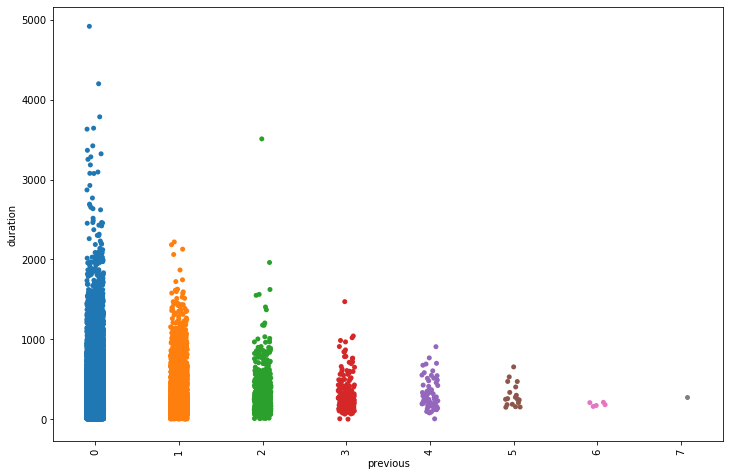

In [65]:
plt.figure(figsize = (12,8))
chart = sns.stripplot(df['previous'], df['duration'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

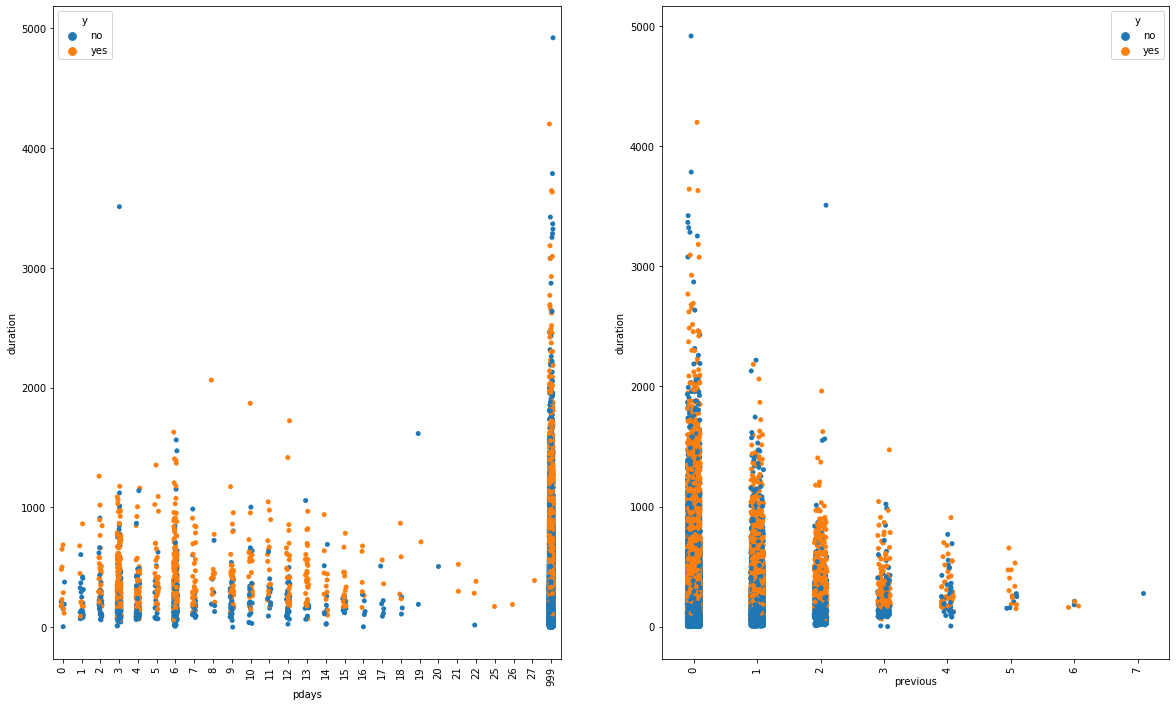

In [66]:
fig,ax = plt.subplots(1, 2, figsize = (20,12))
chart = sns.stripplot(df['pdays'], df['duration'], hue = df['y'], ax = ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
chart = sns.stripplot(df['previous'], df['duration'], hue = df['y'], ax = ax[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

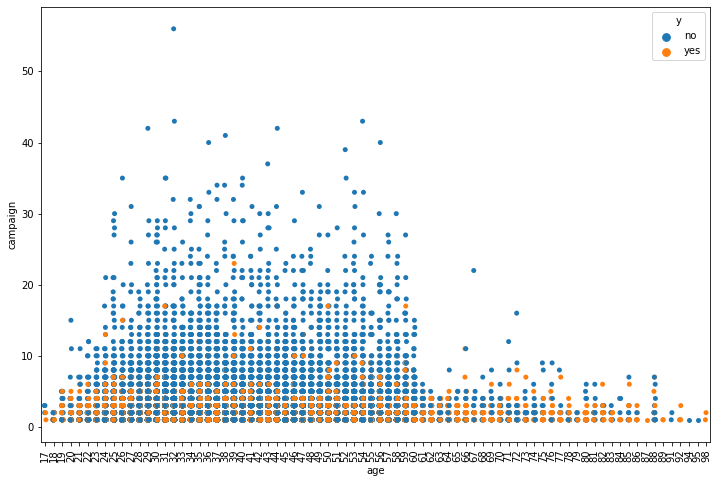

In [67]:
plt.figure(figsize = (12,8))
chart = sns.stripplot(df['age'], df['campaign'], hue = df['y'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

#### Duration of the call vs Number of times contacted during this campaign

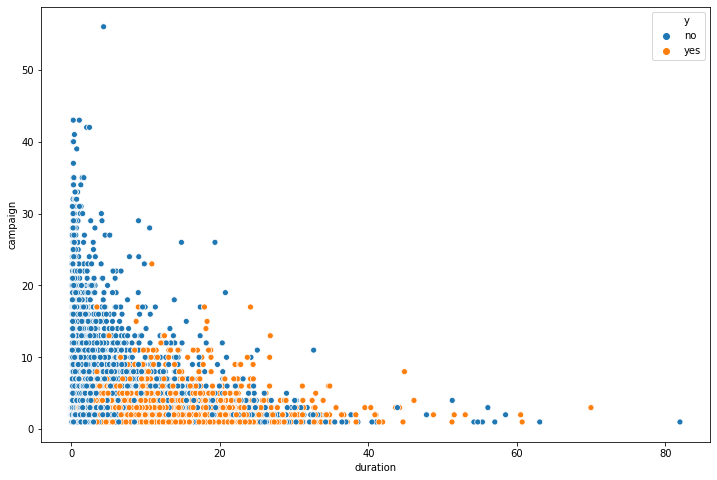

In [68]:
plt.figure(figsize = (12,8))
chart = sns.scatterplot(df['duration']/60, df['campaign'], hue = df['y'])
plt.show()

#### Contact Duration vs Number of times the customer being contacted before this campaign

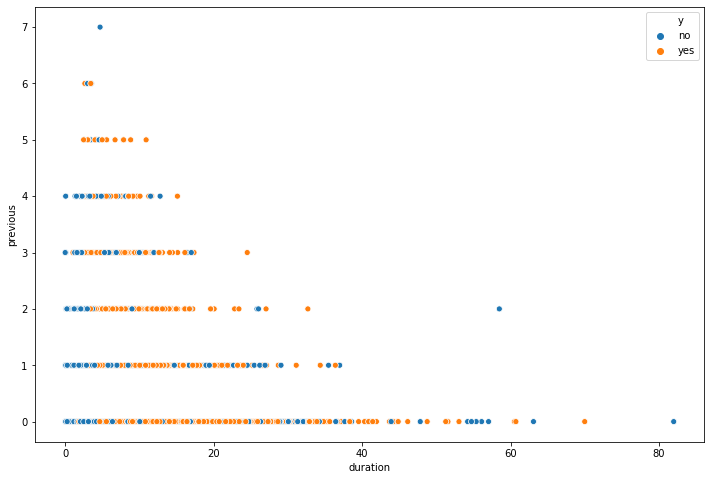

In [69]:
plt.figure(figsize = (12,8))
chart = sns.scatterplot(df['duration']/60, df['previous'], hue = df['y'])
plt.show()

In [70]:
for i in df['previous'].unique():
    print(i)
    print((((df['previous'] == i).groupby(df['y']).agg('sum'))/sum(((df['previous'] ==  i).groupby(df['y']).agg('sum'))))*100)
    print('-'*31)

0
y
no     91.167787
yes     8.832213
Name: previous, dtype: float64
-------------------------------
1
y
no     78.798509
yes    21.201491
Name: previous, dtype: float64
-------------------------------
2
y
no     53.580902
yes    46.419098
Name: previous, dtype: float64
-------------------------------
3
y
no     40.740741
yes    59.259259
Name: previous, dtype: float64
-------------------------------
4
y
no     45.714286
yes    54.285714
Name: previous, dtype: float64
-------------------------------
5
y
no     27.777778
yes    72.222222
Name: previous, dtype: float64
-------------------------------
6
y
no     40.0
yes    60.0
Name: previous, dtype: float64
-------------------------------
7
y
no     100.0
yes      0.0
Name: previous, dtype: float64
-------------------------------


In [71]:
df1['previous'] = df1['previous'].astype('object')

## Statistical Tests

### Kolmogorov - Smirnov test 

In [72]:
from scipy import stats

In [73]:
cont_cols = df1.select_dtypes(include = 'number').columns
cont_cols

Index(['age', 'duration', 'campaign', 'euribor3m'], dtype='object')

In [74]:
for i in cont_cols:
    print(i, '\n')
    statistic, p = stats.kstest(df1[i], 'norm', args = (df1[i].mean(), df1[i].std())) 
    print(' pvalue : ', p)
    if p < 0.05:
        print(' The p-value is lesser than 0.05, so we reject the null hypothesis.','\n','Therefore %s does not follow normal distribution.' %i)
    else:
        print(' The p-value is greater than 0.05, so we cannot reject the null hypothesis.','\n','Therefore %s follows normal distribution.'%i)   
    print('-'*85)

age 

 pvalue :  1.7323e-319
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore age does not follow normal distribution.
-------------------------------------------------------------------------------------
duration 

 pvalue :  0.0
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore duration does not follow normal distribution.
-------------------------------------------------------------------------------------
campaign 

 pvalue :  0.0
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore campaign does not follow normal distribution.
-------------------------------------------------------------------------------------
euribor3m 

 pvalue :  0.0
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore euribor3m does not follow normal distribution.
-------------------------------------------------------------------------------------


### Two sample T-test for Continuous variables

In [75]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway,ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [76]:
df_0 = df[df['y'] == 'no']
df_1 = df[df['y'] == 'yes']

In [77]:
for i in cont_cols:
    print(i, '\n')
    t, p = ttest_ind(df_0[i], df_1[i]) 
    print(' pvalue : ', p)
    if p < 0.05:
        print(' The p-value is lesser than 0.05, so we reject the null hypothesis.','\n','Therefore %s is a significant feature in predicting the target variable y.' %i)
    else:
        print(' The p-value is greater than 0.05, so we cannot reject the null hypothesis.','\n','Therefore %s is not significant feature in predicting the target variable y.'%i)   
    print('-'*85)

age 

 pvalue :  6.80213641846347e-10
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore age is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
duration 

 pvalue :  0.0
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore duration is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
campaign 

 pvalue :  2.0077799906175704e-41
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore campaign is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
euribor3m 

 pvalue :  0.0
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore euribor3m is a significant feature in predicting the target variable y.
------

### Chi square test for Categorical variables

In [78]:
import scipy.stats as stats

In [79]:
cat_cols = df1.select_dtypes(include = 'object').columns
for i in cat_cols:
    print(i)
    print(df1[i].value_counts())
    print('-'*35)

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----------------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-----------------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-----------------------------------
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-----------------------------------
housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int6

In [80]:
df1 = df1.drop('default', 1)

In [81]:
cat_cols = df1.select_dtypes(include = 'object').columns
cat_cols = cat_cols.drop('y')
cat_cols

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'previous', 'poutcome', 'emp.var.rate', 'nr.employed',
       'is_old_customer', 'price.idx.range', 'conf.idx.range'],
      dtype='object')

In [82]:
for i in cat_cols:
    print(i, '\n')
    cross = pd.crosstab(df1['y'], df1[i])
    chisq, pval, dof, exp = stats.chi2_contingency(cross)
    print(' pvalue : ',pval)
    if pval < 0.05:
        print(' The p-value is lesser than 0.05, so we reject the null hypothesis.','\n','Therefore %s is a significant feature in predicting the target variable y.' %i)
    else:
        print(' The p-value is greater than 0.05, so we cannot reject the null hypothesis.','\n','Therefore %s is not significant feature in predicting the target variable y.'%i)   
    print('-'*85)

job 

 pvalue :  4.189763287563861e-199
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore job is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
marital 

 pvalue :  2.068014648442211e-26
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore marital is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
education 

 pvalue :  3.3051890144025054e-38
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore education is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
housing 

 pvalue :  0.05829447669453452
 The p-value is greater than 0.05, so we cannot reject the null hypothesis. 
 Therefore housing is not significant feature i

## Outlier Detection

In [83]:
df_num = df1[['age','duration','campaign','euribor3m']]

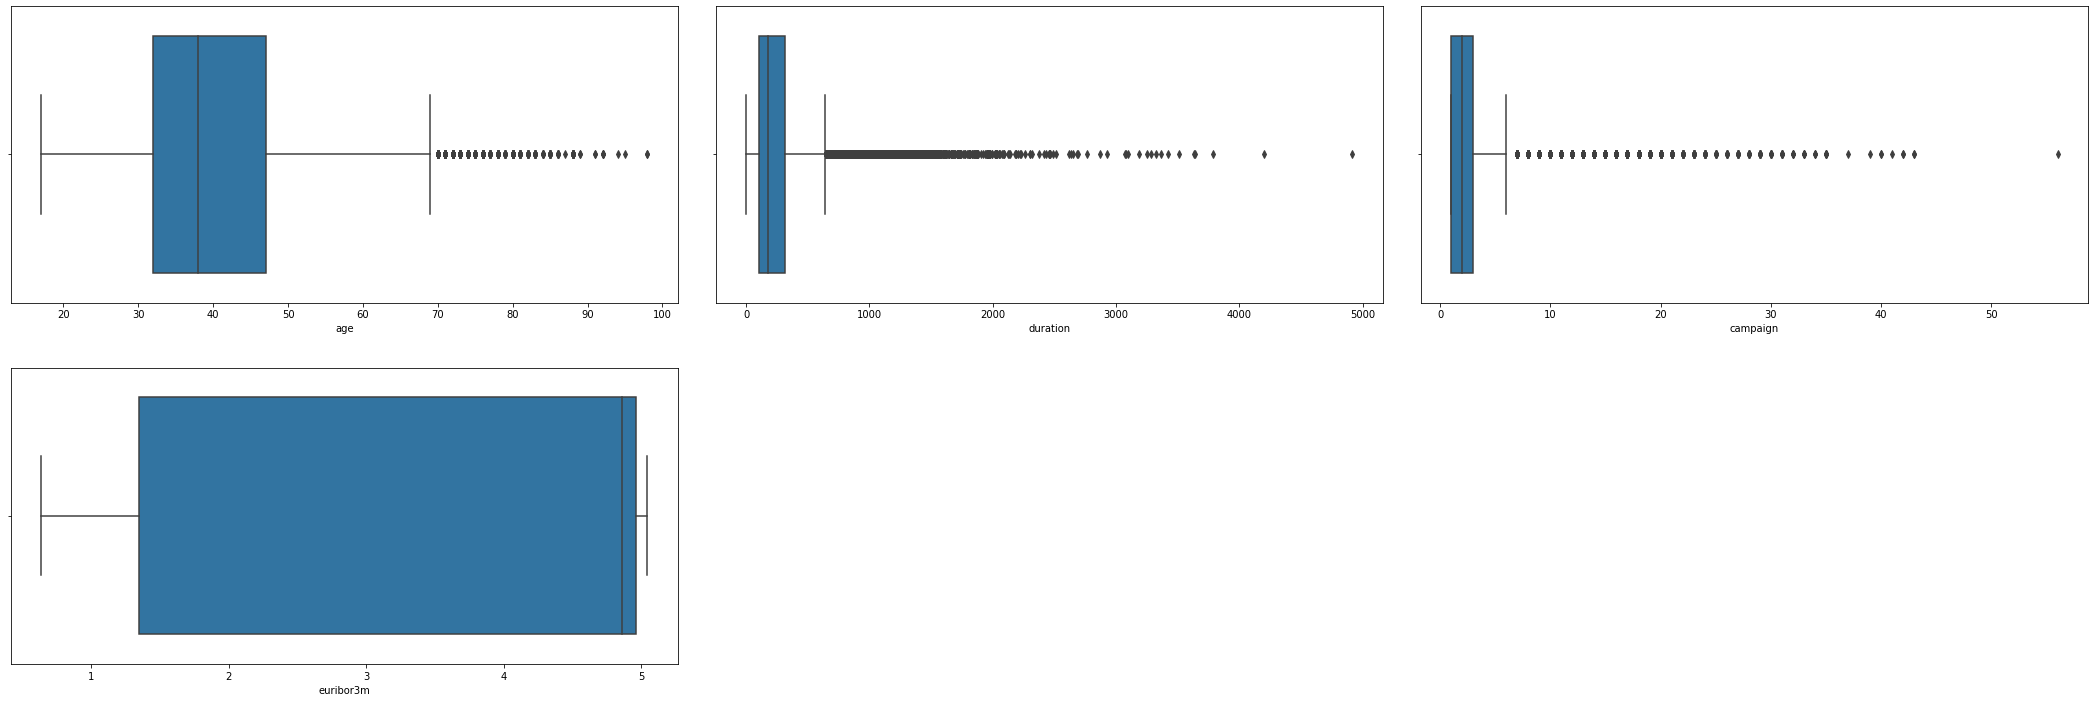

In [84]:
rowCnt = 4
colCnt = 3
subCnt = 1
fig = plt.figure(figsize=(30,20))
for i in df_num.columns:
    fig.add_subplot(rowCnt,colCnt,subCnt)
    fig.tight_layout(pad=3)
    sns.boxplot(df_num[i])
    subCnt += 1
plt.show()

In [85]:
from scipy.stats import boxcox

##### Age

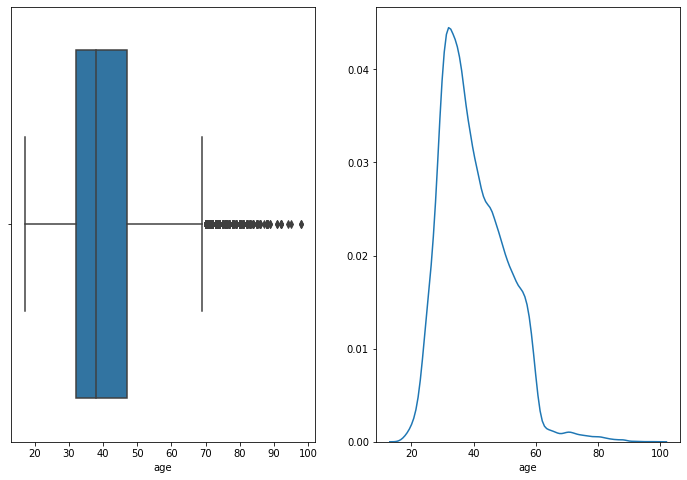

In [86]:
fig, ax = plt.subplots(1,2,figsize = (12,8))
sns.boxplot(df['age'], ax = ax[0])
sns.distplot(df['age'], hist=False, ax = ax[1])
plt.show()

In [87]:
fitted_data_age, fitted_lambda = boxcox(df1['age'])

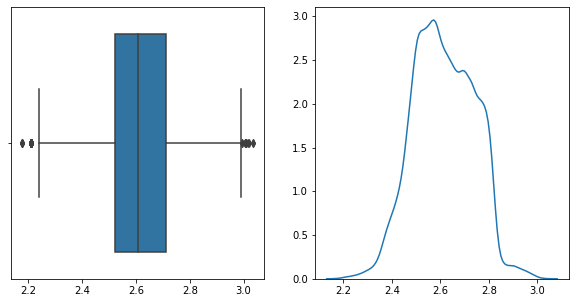

In [88]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(fitted_data_age, ax = ax[0])
sns.distplot(fitted_data_age, hist = False, ax = ax[1])
plt.show()

In [89]:
fitted_lambda

-0.19444047844673226

In [90]:
stats.kstest(fitted_data_age, 'norm', args = (fitted_data_age.mean(), fitted_data_age.std()))

KstestResult(statistic=0.049463453402028956, pvalue=5.91077544103798e-88)

##### Duration

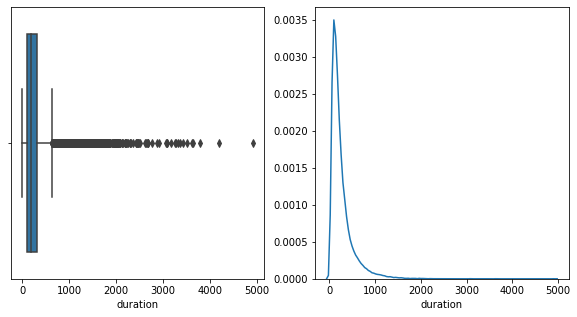

In [91]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(df['duration'],ax = ax[0])
sns.distplot(df['duration'],hist=False,ax = ax[1])
plt.show()

In [92]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
IQR = q3 -q1
ll = (q1 - IQR*1.5)/60
ul = (q3 + IQR*1.5)/60

print('The lower limit is %.2f and upper limit is %.2f '%(ll,ul))

The lower limit is -3.73 and upper limit is 10.74 


In [93]:
 x = df1[df1['duration'] > 0]

In [94]:
fitted_data_duration, fitted_lambda = boxcox(x['duration'])

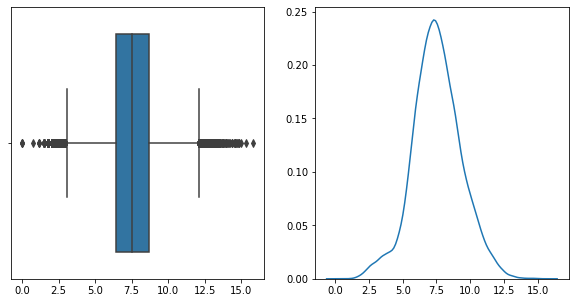

In [95]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(fitted_data_duration, ax = ax[0])
sns.distplot(fitted_data_duration, hist = False, ax = ax[1])
plt.show()

In [96]:
fitted_lambda

0.13343230837941755

##### Campaign

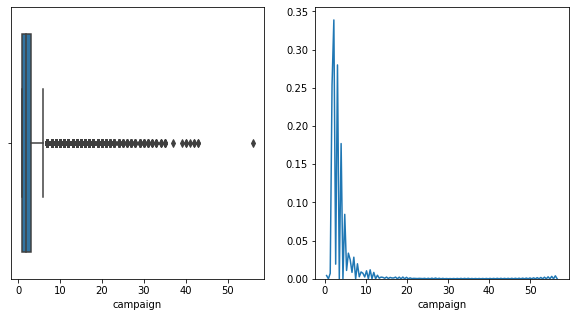

In [97]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(df['campaign'],ax = ax[0])
sns.distplot(df['campaign'],hist=False,ax = ax[1])
plt.show()

In [98]:
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)
IQR = q3 -q1
ll = (q1 - IQR*1.5)
ul = (q3 + IQR*1.5)

print('The lower limit is %.2f and upper limit is %.2f '%(ll,ul))

The lower limit is -2.00 and upper limit is 6.00 


In [99]:
fitted_data_campaign, fitted_lambda = boxcox(df['campaign'])

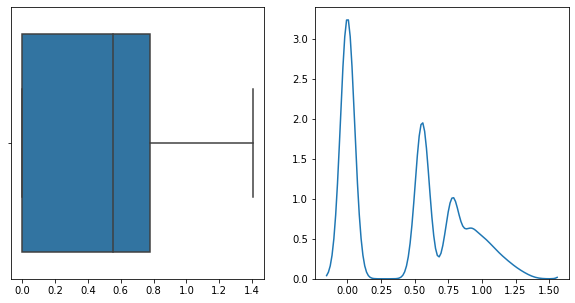

In [100]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(fitted_data_campaign, ax = ax[0])
sns.distplot(fitted_data_campaign, hist = False,ax = ax[1])
plt.show()

In [101]:
fitted_lambda

-0.6627357510367072

In [102]:
df['y'] = df['y'].map({'no':0, 'yes':1})
df1['y'] = df1['y'].map({'no':0, 'yes':1})

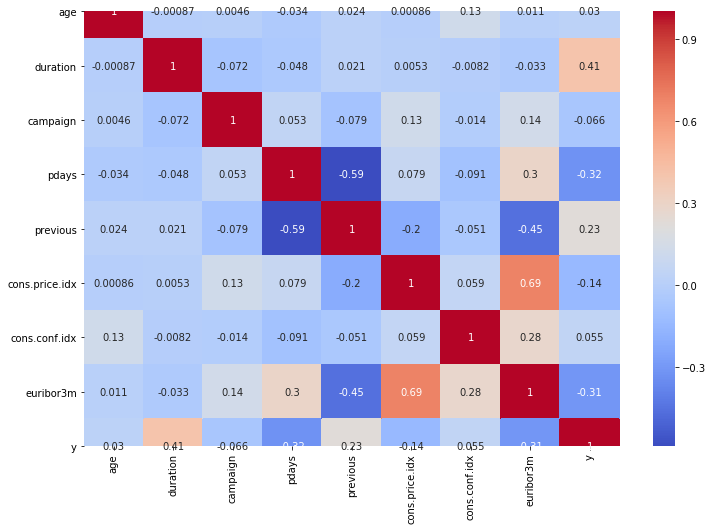

In [103]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [104]:
df1[['emp.var.rate', 'nr.employed']] = df1[['emp.var.rate', 'nr.employed']].astype('float64')

## Label Encoding

In [105]:
df1['job'] = df['job'].map({'admin.':0, 'blue-collar':1, 'technician':2, 'services':3, 'management':4, 'retired':5,
                        'entrepreneur':6, 'self-employed':7, 'housemaid':8, 'unemployed':9, 'student':10, 'unknown':11})

In [106]:
df1['job'].replace(11, np.nan, inplace = True)

In [107]:
df1['marital'] = df1['marital'].map({'married':0, 'single':1, 'divorced':2, 'unkown':3})

In [108]:
df1['marital'].replace(3, np.nan,inplace = True)

In [109]:
df1['education'] = df1['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4,
                                         'professional.course':5, 'university.degree':6, 'unknown':7})

In [110]:
df1['education'].replace(7, np.nan, inplace = True)

In [111]:
df1['housing'] = df1['housing'].map({'no':0, 'yes':1, 'unknown':2})

In [112]:
df1['housing'].replace(2, np.nan, inplace = True)

In [113]:
df1['loan'] = df1['loan'].map({'no':0, 'yes':1, 'unkown':2})

In [114]:
df1['loan'].replace(2, np.nan, inplace = True)

In [115]:
df1['contact'] = df1['contact'].map({'cellular':0, 'telephone':1})

In [116]:
df1['month'] = df1['month'].map({'mar':0, 'apr':1, 'may':2, 'jun':3, 'jul':4, 'aug':5, 'sep':6, 'oct':7, 'nov':8, 'dec':9})

In [117]:
df1['day_of_week'] = df1['day_of_week'].map({'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4})

In [118]:
df1['poutcome'] = df1['poutcome'].map({'failure':0, 'success':1, 'nonexistent':2})

In [119]:
df1[['price.idx.range', 'conf.idx.range', 'is_old_customer']] = df1[['price.idx.range', 'conf.idx.range', 'is_old_customer']].astype('int64')

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age                41188 non-null int64
job                40858 non-null float64
marital            41108 non-null float64
education          39457 non-null float64
housing            40198 non-null float64
loan               40198 non-null float64
contact            41188 non-null int64
month              41188 non-null int64
day_of_week        41188 non-null int64
duration           41188 non-null int64
campaign           41188 non-null int64
previous           41188 non-null object
poutcome           41188 non-null int64
emp.var.rate       41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
y                  41188 non-null int64
is_old_customer    41188 non-null int64
price.idx.range    41188 non-null int64
conf.idx.range     41188 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 6.3+ MB


In [121]:
df1.isnull().sum()  # After encoding and converting the unknown values to Nan, below are the Nan values in the dataframe

age                   0
job                 330
marital              80
education          1731
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
previous              0
poutcome              0
emp.var.rate          0
euribor3m             0
nr.employed           0
y                     0
is_old_customer       0
price.idx.range       0
conf.idx.range        0
dtype: int64

## Imputing

In [122]:
from sklearn.impute import KNNImputer          #Imputation using KNN Imputer

In [123]:
knn = KNNImputer()              #storing the object in a variable

In [124]:
df1_1 = knn.fit_transform(df1)          #imputing the Nan Values
df1_1 = pd.DataFrame(df1_1, columns = df1.columns)    #storing in a dataframe

In [125]:
df1_1[['job', 'marital', 'education', 'housing', 'loan']] = df1_1[['job', 'marital', 'education', 'housing', 'loan']].round()

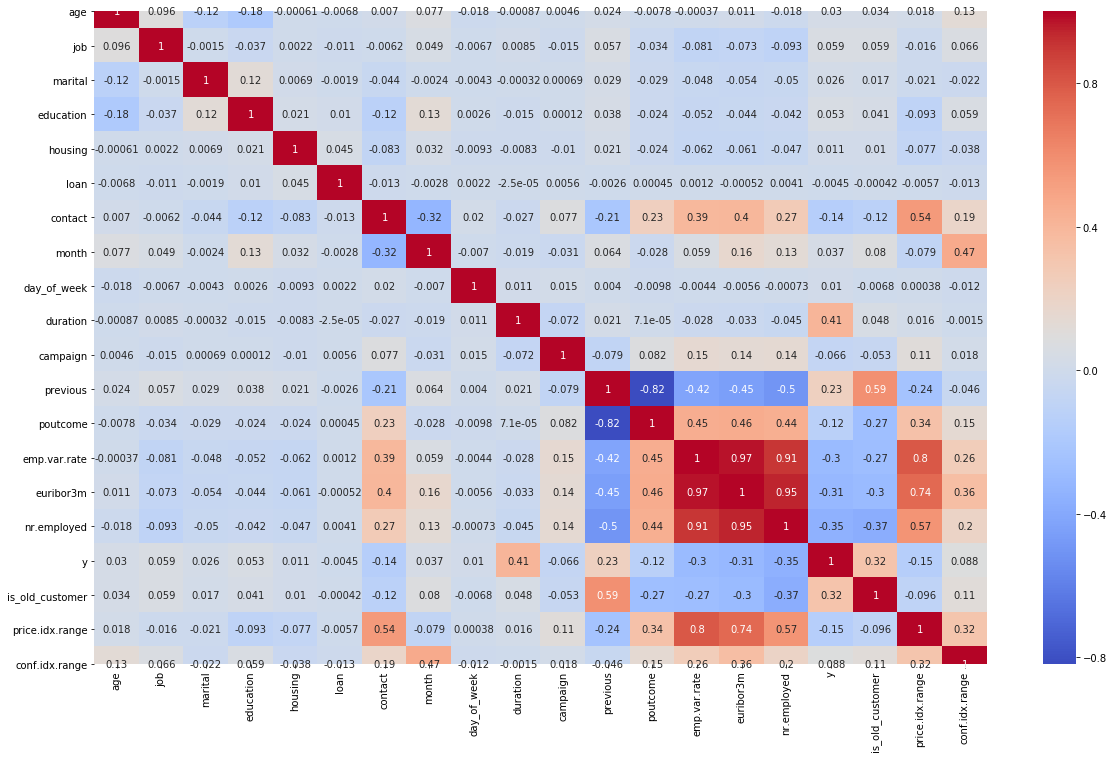

In [126]:
plt.figure(figsize = (20,12))
sns.heatmap(df1_1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [127]:
abs(df1_1.corr()['y']).sort_values(ascending = False)

y                  1.000000
duration           0.405274
nr.employed        0.354678
is_old_customer    0.324877
euribor3m          0.307771
emp.var.rate       0.298334
previous           0.230181
price.idx.range    0.145895
contact            0.144773
poutcome           0.122089
conf.idx.range     0.087782
campaign           0.066357
job                0.059310
education          0.052952
month              0.037187
age                0.030399
marital            0.025814
housing            0.011472
day_of_week        0.010051
loan               0.004491
Name: y, dtype: float64

In [128]:
for i in cat_cols:
    print(i, '\n')
    cross = pd.crosstab(df1_1['y'], df1_1[i])
    chisq, pval, dof, exp = stats.chi2_contingency(cross)
    print(' pvalue : ',pval)
    if pval < 0.05:
        print(' The p-value is lesser than 0.05, so we reject the null hypothesis.','\n','Therefore %s is a significant feature in predicting the target variable y.' %i)
    else:
        print(' The p-value is greater than 0.05, so we cannot reject the null hypothesis.','\n','Therefore %s is not significant feature in predicting the target variable y.'%i)   
    print('-'*85)

job 

 pvalue :  3.33792135073991e-201
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore job is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
marital 

 pvalue :  3.446980560086016e-27
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore marital is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
education 

 pvalue :  2.7997382809825727e-35
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore education is a significant feature in predicting the target variable y.
-------------------------------------------------------------------------------------
housing 

 pvalue :  0.020740852975077422
 The p-value is lesser than 0.05, so we reject the null hypothesis. 
 Therefore housing is a significant feature in predicti

In [129]:
df1_1 = df1_1.drop('loan', 1)

In [130]:
df1_1.to_csv('df1_1.csv', index = False)